In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df = df[["Country","DevType","EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [4]:
df = df[df["Salary"].notnull()]
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,"Designer;Developer, front-end",Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   DevType       34367 non-null  object 
 2   EdLevel       34188 non-null  object 
 3   YearsCodePro  34621 non-null  object 
 4   Employment    34717 non-null  object 
 5   Salary        34756 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [6]:
df = df.dropna()
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [7]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29722 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       29722 non-null  object 
 1   DevType       29722 non-null  object 
 2   EdLevel       29722 non-null  object 
 3   YearsCodePro  29722 non-null  object 
 4   Salary        29722 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df['Country'].value_counts()

United States     7468
India             2409
United Kingdom    2247
Germany           1891
Canada            1161
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [9]:
df[df["Salary"]<150000]
df[df["Salary"]>10000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29722 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       29722 non-null  object 
 1   DevType       29722 non-null  object 
 2   EdLevel       29722 non-null  object 
 3   YearsCodePro  29722 non-null  object 
 4   Salary        29722 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


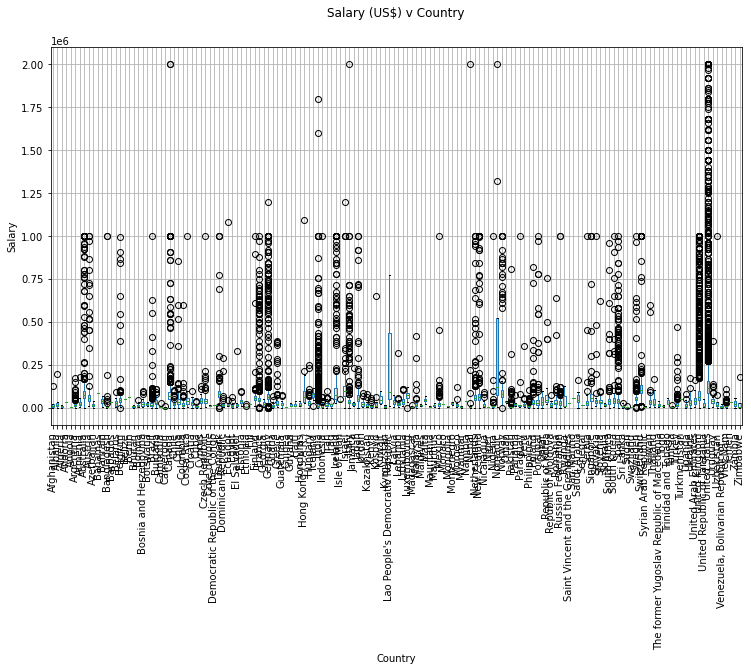

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [11]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '12', '10', '14', '29', '6',
       '28', '8', '23', '15', '25', 'Less than 1 year', '5', '9', '11',
       '21', '16', '18', '32', '19', '22', '38', '30', '26', '17', '27',
       '24', '33', '34', '35', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49', '47', '46'],
      dtype=object)

In [12]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [13]:
df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 12. , 10. , 14. , 29. ,
        6. , 28. ,  8. , 23. , 15. , 25. ,  0.5,  5. ,  9. , 11. , 21. ,
       16. , 18. , 32. , 19. , 22. , 38. , 30. , 26. , 17. , 27. , 24. ,
       33. , 34. , 35. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. , 47. , 46. ])

In [14]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [15]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [16]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [17]:
def clean_devtype(x):
    if 'Developer, back-end' in x:
        return 'Developer, back-end'
    if 'Developer, full-stack;Developer, mobile' in x:
        return 'Developer, full-stack;Developer, mobile'
    if 'Designer;Developer, front-end' in x :
        return 'Designer;Developer, front-end'
    if 'Developer, front-end' in x :
        return 'Developer, front-end'
    return 'Other type'

df['DevType'] = df['DevType'].apply(clean_devtype)

In [18]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 2, 1, 3])

In [19]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([146, 144, 126,  94,  48,  26,  15,  66,  22,  46, 107,  60,  50,
        34,  23,  59, 142, 131,  57, 112, 108,  86,  65,  98,  45, 130,
         8, 139, 103,  63,  42, 106,   7, 105,  33, 127, 133,  74,  31,
        40,   5,  61,  49,   1, 100, 102,  90, 138,  39,  54,  78,  41,
        55,  77,  93,  37, 119,  51, 132,  12, 143,  14, 113, 128, 124,
        27,  69,  47,  30, 117,  29,  95,   6, 121,  99,  32,  79, 120,
       147,   9,  38, 122,   0,  28,  64, 137,  58,  73,  20, 149,  19,
       110,  68, 104, 125,  56,  81, 150,  91,  71, 134,  67,  96,  82,
        24, 141, 148,  62, 135,  70, 109,  80,  83, 111,  88,  21,  76,
       101, 153, 123,  89,   2,  43,  92,  36,  18,  25,  72, 145,  17,
       136,  35,  85, 152,  52,  10, 114, 140,  11,  75, 116,  44,  84,
        13,  53,   4, 118,  87, 115, 129,  97,  16, 151,   3])

In [20]:
le_devtype = LabelEncoder()
df = df[df["DevType"].notnull()]
df['DevType'] = le_devtype.fit_transform(df['DevType'])
df["DevType"].unique()

array([1, 3, 0, 2, 4])

In [21]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

C:\Users\ASUS\AppData\Local\Temp/ipykernel_24812/1508237000.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


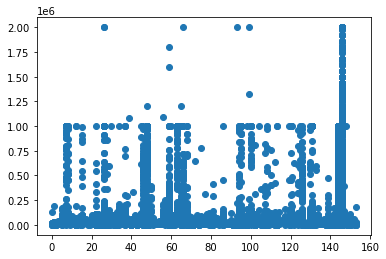

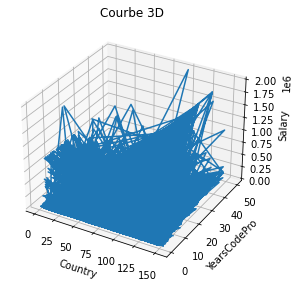

In [22]:
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
import numpy as np
plt.scatter(X["Country"],y)


# Tracé le résultat en 3D
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot(df["Country"], df["YearsCodePro"], df["Salary"], label='Courbe')  # Tracé de la courbe 3D
plt.title("Courbe 3D")
ax.set_xlabel('Country')
ax.set_ylabel('YearsCodePro')
ax.set_zlabel('Salary')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [24]:
column_names = ["Country","DevType","EdLevel", "YearsCodePro"]
y_pred = linear_reg.predict(pd.DataFrame(X,columns=column_names))

C:\Users\ASUS\AppData\Local\Temp/ipykernel_24812/2594324968.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


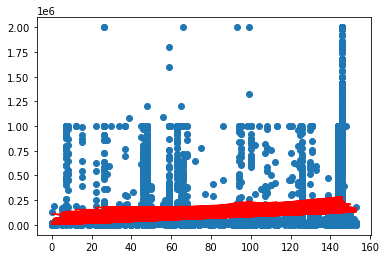

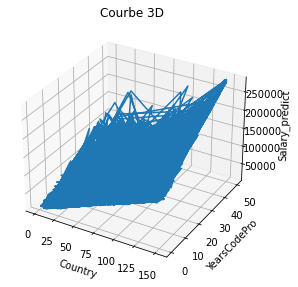

In [25]:

from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
import numpy as np
plt.scatter(X["Country"],y)
plt.plot(X["Country"],y_pred,c='r')


# Tracé du résultat en 3D
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot(df["Country"], df["YearsCodePro"], y_pred, label='Courbe')  # Tracé de la courbe 3D
plt.title("Courbe 3D")
ax.set_xlabel('Country')
ax.set_ylabel('YearsCodePro')
ax.set_zlabel('Salary_predict')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [27]:
error

230253.24928813352

In [28]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

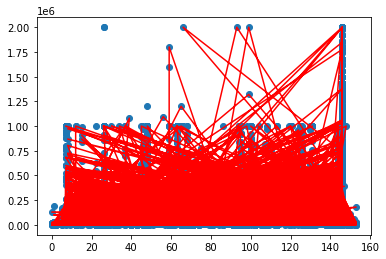

In [29]:
column_names = ["Country","DevType","EdLevel", "YearsCodePro"]
y_pred = dec_tree_reg.predict(pd.DataFrame(X,columns=column_names))
plt.scatter(X["Country"],y)
plt.plot(X["Country"],y_pred,c='r')

In [30]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$207,141.95


In [31]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

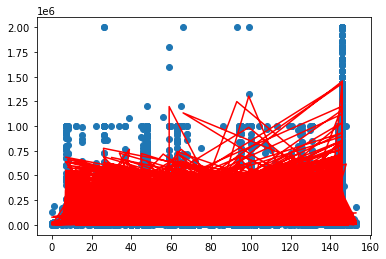

In [32]:
column_names = ["Country","DevType","EdLevel", "YearsCodePro"]
y_pred = random_forest_reg.predict(pd.DataFrame(X,columns=column_names))
plt.scatter(X["Country"],y)
plt.plot(X["Country"],y_pred,c='r')

In [33]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$208,708.26


In [34]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

$223,502.89


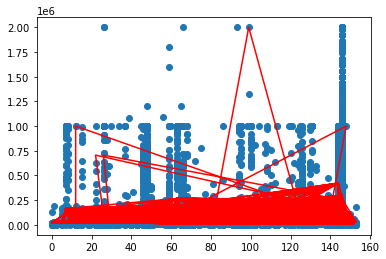

In [35]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
column_names = ["Country","DevType","EdLevel", "YearsCodePro"]
y_pred = regressor.predict(pd.DataFrame(X,columns=column_names))
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))
plt.scatter(X["Country"],y)
plt.plot(X["Country"],y_pred,c='r')

In [36]:
X

,Country,DevType,EdLevel,YearsCodePro
7,146,1,0,13.0
9,144,3,2,4.0
10,144,1,0,2.0
11,126,0,1,7.0
12,94,1,1,20.0
...,...,...,...,...
64135,37,2,0,4.0
64148,29,4,0,5.0
64152,146,1,1,20.0
64153,27,4,0,3.0


In [37]:
regressor=dec_tree_reg

In [60]:
# country, ,devtype, edlevel, yearscode
X = np.array([["United States","Developer, full-stack;Developer, mobile" ,'Master’s degree', 5 ]])
X

array([['United States', 'Developer, full-stack;Developer, mobile',
        'Master’s degree', '5']], dtype='<U39')

In [61]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_devtype.transform(X[:,1])
X[:, 2] = le_education.transform(X[:,2])
X

array([['146', '3', '2', '5']], dtype='<U39')

In [62]:
column_names = ["Country","DevType","EdLevel", "YearsCodePro"]
y_pred = regressor.predict(pd.DataFrame(X,columns=column_names))
y_pred

array([111250.])

In [63]:
import pickle

In [64]:
data = {"model": regressor, "le_country": le_country, "le_devtype": le_devtype, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [65]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_devtype=data["le_devtype"]
le_education = data["le_education"]

In [66]:
column_names = ["Country","DevType","EdLevel", "YearsCodePro"]
y_pred = regressor.predict(pd.DataFrame(X,columns=column_names))
y_pred

array([111250.])